# Pytorch Basics


#### Table of contents
0. Pytorch tensors

1. Basic autograd example 1

2. Basic autograd example 2

3. Loading data from numpy

4. Input pipeline           

5. Input pipeline for custom dataset

6. Pretrained model                 

7. Save and load model

8. Train a simple MNIST Neural nets




In [ ]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


##0. Pytorch tensors

In [ ]:
# Very similar to numpy
x = torch.tensor(1.)
print(x)

x = torch.tensor([1,2,3,4,5])
print(x)
print(x.size())

tensor(1.)
tensor([1, 2, 3, 4, 5])
torch.Size([5])


In [ ]:
# min, max, mean, reshaping
ran = torch.Tensor(2,2,3).uniform_()
print(ran)
print(ran.size())
print(ran.min())
print(ran.max())
print(ran.mean())
print("="*50)
rsan = ran.view(2,3,2)
print(rsan)
print(rsan.size())

tensor([[[0.5268, 0.1164, 0.2240],
         [0.7408, 0.2108, 0.1341]],

        [[0.0977, 0.6493, 0.0820],
         [0.9627, 0.6193, 0.6694]]])
torch.Size([2, 2, 3])
tensor(0.0820)
tensor(0.9627)
tensor(0.4194)
tensor([[[0.5268, 0.1164],
         [0.2240, 0.7408],
         [0.2108, 0.1341]],

        [[0.0977, 0.6493],
         [0.0820, 0.9627],
         [0.6193, 0.6694]]])
torch.Size([2, 3, 2])


In [ ]:
# Tensor math
x = torch.randint(1, 5, (3,4))
y = torch.randint(1, 5, (3,4))
print(x.size())
print(y.size())
print(x)
print(y)
a = x + y
m = x * y
print("="*50)
print("Add:",a)
print("Multiply:",m)
print("="*50)
# transpose of y (the last 2 dimension)
yt = y.transpose(0, 1)
print("yt size:",yt.size())
matmul = torch.matmul(x, yt)
print("matmul size:",matmul.size())
print(matmul)

torch.Size([3, 4])
torch.Size([3, 4])
tensor([[4, 1, 2, 1],
        [4, 4, 1, 3],
        [3, 4, 1, 3]])
tensor([[3, 4, 4, 2],
        [3, 2, 3, 1],
        [4, 4, 1, 3]])
Add: tensor([[7, 5, 6, 3],
        [7, 6, 4, 4],
        [7, 8, 2, 6]])
Multiply: tensor([[12,  4,  8,  2],
        [12,  8,  3,  3],
        [12, 16,  1,  9]])
yt size: torch.Size([4, 3])
matmul size: torch.Size([3, 3])
tensor([[26, 21, 25],
        [38, 26, 42],
        [35, 23, 38]])


##1. Basic autograd example 1

In [ ]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2
print(w.grad)    # w.grad = 1
print(b.grad)    # b.grad = 1


tensor(2.)
tensor(1.)
tensor(1.)


##1. Basic autograd example 2

In [ ]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

# Forward pass.
pred = linear(x)

# Compute loss.
print("="*50)
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad)
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()


print("="*50)
print ('w: ', linear.weight)
print ('b: ', linear.bias)


# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())



w:  Parameter containing:
tensor([[-0.5032, -0.4114, -0.1698],
        [-0.0320, -0.1008, -0.3460]], requires_grad=True)
b:  Parameter containing:
tensor([0.2052, 0.1875], requires_grad=True)
loss:  0.9699196815490723
dL/dw:  tensor([[-0.0274, -0.6170,  0.3590],
        [-0.1329, -0.7294, -0.6045]])
dL/db:  tensor([-0.2394, -0.3582])
w:  Parameter containing:
tensor([[-0.5005, -0.3497, -0.2057],
        [-0.0187, -0.0278, -0.2856]], requires_grad=True)
b:  Parameter containing:
tensor([0.2292, 0.2234], requires_grad=True)
loss after 1 step optimization:  0.8253658413887024


##3. Loading data from numpy

In [ ]:
# Create a numpy array.
x = np.array([[1, 2], [3, 4]])

# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.
z = y.numpy()


##4. Input pipeline

In [ ]:
# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(
  root='.',
  train=True,
  transform=transforms.ToTensor(),
  download=True)

# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print(image.size())
print(label)

# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True)

# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass



Files already downloaded and verified
torch.Size([3, 32, 32])
6


##5. Input pipeline for custom dataset

In [ ]:
# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file paths or a list of file names.
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0

# You can then use the prebuilt data loader.
"""
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(
    dataset=custom_dataset,
    batch_size=64,
    shuffle=True)
"""


'\ncustom_dataset = CustomDataset()\ntrain_loader = torch.utils.data.DataLoader(\n    dataset=custom_dataset,\n    batch_size=64, \n    shuffle=True)\n'

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(torch.utils.data.Dataset):
    def __init__(self, annotations_file, img_dir, transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        return image, label

##6. Pretrained model

In [ ]:
# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only the top layer of the model, set as below.
for param in resnet.parameters():
    param.requires_grad = False

# Replace the top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
outputs = resnet(images)
print (outputs.size())     # (64, 100)


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

torch.Size([64, 100])


##7. Save and load model

In [ ]:
# Save and load the entire model.
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')

# Save and load only the model parameters (recommended).
torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))

<All keys matched successfully>

##8. Train a simple MNIST Neural nets
Let's train a simple neural network to classify MNIST hand-written digit


####1. Download the dataset

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784 # 28 * 28 - fixed
hidden_size = 500
num_classes = 10 # 0-9 - fixed
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='.',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='.',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



torch.Size([28, 28]) , Label: 1


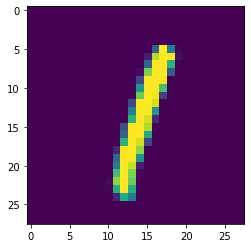

In [ ]:
image, label = test_dataset[5]
# reduce batch=1 to no batch
image = image[0]
print(f'{image.size()} , Label: {label}')
plt.imshow(image)

####2. Initiate the Neural Network (multi-layer perceptron)
The network has 2 layers, with ReLu activation in between

![](https://www.researchgate.net/profile/Mohamed_Zahran6/publication/303875065/figure/fig4/AS:371118507610123@1465492955561/A-hypothetical-example-of-Multilayer-Perceptron-Network.png)


In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001


# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)


####3. Train the network

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/5], Step [100/600], Loss: 0.3755
Epoch [1/5], Step [200/600], Loss: 0.3028
Epoch [1/5], Step [300/600], Loss: 0.1950
Epoch [1/5], Step [400/600], Loss: 0.0825
Epoch [1/5], Step [500/600], Loss: 0.1691
Epoch [1/5], Step [600/600], Loss: 0.0747
Epoch [2/5], Step [100/600], Loss: 0.1638
Epoch [2/5], Step [200/600], Loss: 0.0928
Epoch [2/5], Step [300/600], Loss: 0.0607
Epoch [2/5], Step [400/600], Loss: 0.1208
Epoch [2/5], Step [500/600], Loss: 0.0553
Epoch [2/5], Step [600/600], Loss: 0.0914
Epoch [3/5], Step [100/600], Loss: 0.0726
Epoch [3/5], Step [200/600], Loss: 0.2141
Epoch [3/5], Step [300/600], Loss: 0.1106
Epoch [3/5], Step [400/600], Loss: 0.1278
Epoch [3/5], Step [500/600], Loss: 0.0446
Epoch [3/5], Step [600/600], Loss: 0.0476
Epoch [4/5], Step [100/600], Loss: 0.0708
Epoch [4/5], Step [200/600], Loss: 0.0270
Epoch [4/5], Step [300/600], Loss: 0.0706
Epoch [4/5], Step [400/600], Loss: 0.0572
Epoch [4/5], Step [500/600], Loss: 0.0579
Epoch [4/5], Step [600/600], Loss:

####4. Test the network

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.pt')

Accuracy of the network on the 10000 test images: 97.7 %


#### Credits: https://github.com/keineahnung2345/pytorch-tutorial-jupyter-notebooks